# Initial test to run ECmean4 functions within the AQUA framework

Start loading the ecmean functions

In [1]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices

exp = '4km'
year1 = 2020
year2 = 2020
numproc = 1
interface = 'interface_IFS+NEMO.yml'

# Global Mean
Basic call to global mean, creating a dumb interface file for IFS/NEMO and working directly on the 1x1 files

In [2]:
global_mean(exp, year1, year2, numproc = numproc, config = 'config.yml', 
            interface = interface)

['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc', '/work/bm1235/a270046/cycle2-sync/monthly_means/4km/e_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc', '/work/bm1235/a270046/cycle2-sync/monthly_means/4km/e_4km.nc']
Average pme 0.003838254768066899
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/2t_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/2t_4km.nc']
Average tas 288.42323055351955
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc']
Average pr 3.028001273472465
Done in 1.1673 seconds
/work/bb1153/b382076/ecmean/tables/global_mean_4km_IFS+NEMO_r1i1p1f1_2020_2020.txt


Open the obtained txt file

In [4]:
table_name = '/work/bb1153/b382076/ecmean/tables/global_mean_' + exp + '_IFS+NEMO_r1i1p1f1_' + str(year1) + '_' + str(year2) + '.txt'
f = open(table_name, 'r')
file_contents = f.read()
print(file_contents)
f.close()

| Variable   | Longname            | Units   |     IFS+NEMO |      Obs. | Dataset   | Years     |
|------------+---------------------+---------+--------------+-----------+-----------+-----------|
| tas        | 2m Temperature      | K       | 288.423      | 287.497   | ERA5      | 1990-2019 |
| pr         | Total precipitation | mm/day  |   3.028      |   2.92552 | ERA5      | 1990-2019 |
| pme        | Precip. minus evap. | mm/day  |   0.00383825 |   0       |           |           |


## Performance indices
Now try with Performance Indices

In [6]:
performance_indices(exp, year1, year2, numproc = numproc, config = 'config.yml', 
            interface = interface, loglevel = 'info')

Preproc in 1.5278 seconds
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/2t_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/2t_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/2t_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/2t_4km.nc']
PI for Global ALL tas 40.206
PI for Global DJF tas 18.789
PI for Global JJA tas 37.246
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc']
['/work/bm1235/a270046/cycle2-sync/monthly_means/4km/tp_4km.nc']
PI for Global ALL pr 6.708
PI for Global DJF pr 4.596
PI for Global JJA pr 6.513
Done in 1.8348 seconds with 1 processors
Postproc done in 0.5889 seconds


Performance indices produces a PDF file showing the PI relative to CMIP6 models. This cannot be easily imported within the jupyter workflow so that we try some trick to load it using external packages (as wand)

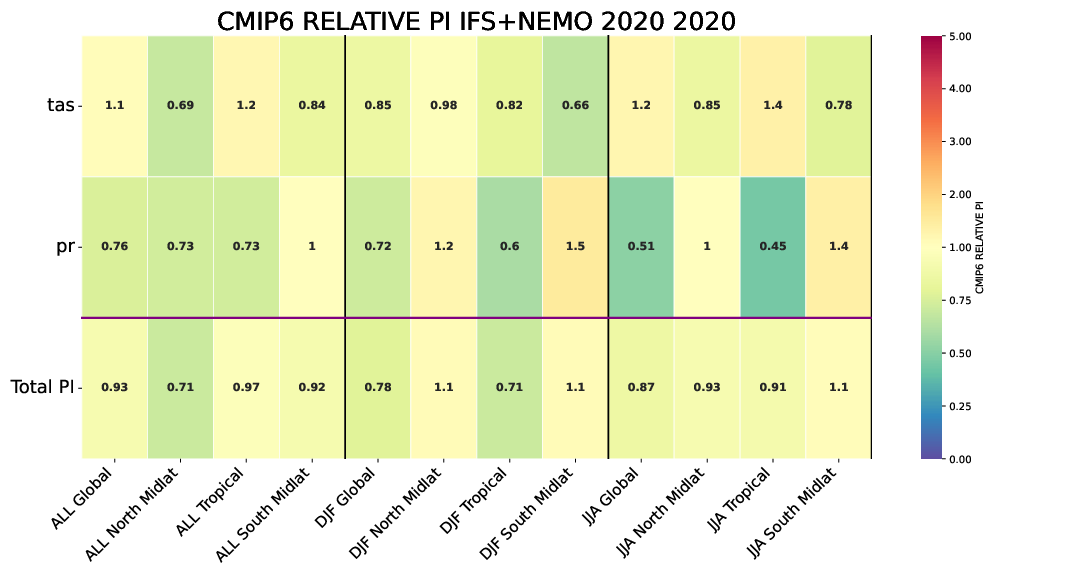

In [7]:
from wand.image import Image as WImage
img = WImage(filename='/work/bb1153/b382076/ecmean/figures/PI4_EC23_4km_IFS+NEMO_r1i1p1f1_2020_2020.pdf')
img